In [84]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_excel(r'C:\Users\ablab\Downloads\datacleaning2- Copy   (1).xlsx')

In [54]:
df.head()

,Année de réalisation,Date début,Nature Entité,Ville,Administration,Nom de projet,Nature du Document,Distance Autorisation / ml,Redevance / ml,Nombre de chambres,Redevance / Chambre,Total Redevance,Autorisation,Date Fin,Programme
0,2023,2023-10-02 00:00:00,CU,Laayoune,CU Laayoune,Laayoune Centre A1,Autorisation N°23/370,1089,6,16,100,8134.0,Autre,2024-01-02,VULA
1,2023,2023-10-02 00:00:00,CU,Laayoune,CU Laayoune,LAA005,Autorisation N°23/369,1750,6,25,100,13000.0,Autre,2024-01-02,FTTS
2,2019,2019-11-18 00:00:00,CU,Laayoune,CU Laayoune,LAA004,Autorisation N°18/758,1900,6,5,100,11900.0,Autre,2020-02-18,FTTS
3,2019,2019-12-13 00:00:00,CU,Laayoune,CU Laayoune,LAA001,Autorisation N°19/743,200,6,1,100,1300.0,Autre,2020-03-13,FTTS
4,2022,2022-04-05 00:00:00,CU,Laayoune,CU Laayoune,LAA024,Autorisation N°22/186,670,6,0,400,4020.0,Autre,2022-07-05,FTTS


In [55]:
df.shape

(3388, 15)

In [56]:
df.columns

Index(['Année de réalisation ', 'Date début', 'Nature Entité', 'Ville',
       'Administration', 'Nom de projet', 'Nature du Document',
       'Distance Autorisation / ml', 'Redevance / ml', 'Nombre de chambres',
       'Redevance / Chambre', 'Total Redevance', 'Autorisation', 'Date Fin',
       'Programme'],
      dtype='object')

In [57]:
df.dtypes

Année de réalisation                  object
Date début                            object
Nature Entité                         object
Ville                                 object
Administration                        object
Nom de projet                         object
Nature du Document                    object
Distance Autorisation / ml            object
Redevance / ml                        object
Nombre de chambres                    object
Redevance / Chambre                   object
Total Redevance                      float64
Autorisation                          object
Date Fin                      datetime64[ns]
Programme                             object
dtype: object

In [58]:
df.isnull().sum()

Année de réalisation          0
Date début                    0
Nature Entité                 0
Ville                         0
Administration                0
Nom de projet                 0
Nature du Document            0
Distance Autorisation / ml    6
Redevance / ml                2
Nombre de chambres            0
Redevance / Chambre           0
Total Redevance               1
Autorisation                  0
Date Fin                      0
Programme                     0
dtype: int64

In [59]:
df.dropna(inplace=True)


In [66]:
df.isnull().sum()

Année de réalisation          0
Date début                    0
Nature Entité                 0
Ville                         0
Administration                0
Nom de projet                 0
Nature du Document            0
Distance Autorisation / ml    3
Redevance / ml                0
Nombre de chambres            0
Redevance / Chambre           0
Total Redevance               0
Autorisation                  0
Date Fin                      0
Programme                     0
dtype: int64

In [61]:
invalid_dates_fin = pd.to_datetime(df['Date Fin'], errors='coerce', dayfirst=True)
invalid_rows_fin = df[invalid_dates_fin.isna()]
print(invalid_rows_fin[['Nom de projet', 'Date Fin']])


Empty DataFrame
Columns: [Nom de projet, Date Fin]
Index: []


In [62]:
df['Date début'] = pd.to_datetime(df['Date début'])
df['Date Fin'] = pd.to_datetime(df['Date Fin'])


In [63]:
df['Distance Autorisation / ml'] = pd.to_numeric(df['Distance Autorisation / ml'], errors='coerce')


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3381 entries, 0 to 3387
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Année de réalisation        3381 non-null   object        
 1   Date début                  3381 non-null   datetime64[ns]
 2   Nature Entité               3381 non-null   object        
 3   Ville                       3381 non-null   object        
 4   Administration              3381 non-null   object        
 5   Nom de projet               3381 non-null   object        
 6   Nature du Document          3381 non-null   object        
 7   Distance Autorisation / ml  3378 non-null   float64       
 8   Redevance / ml              3381 non-null   object        
 9   Nombre de chambres          3381 non-null   object        
 10  Redevance / Chambre         3381 non-null   object        
 11  Total Redevance             3381 non-null   float64       
 1

In [67]:
df['Distance Autorisation / ml'].fillna(df['Distance Autorisation / ml'].mean(), inplace=True)


In [68]:
df.isnull().sum()

Année de réalisation          0
Date début                    0
Nature Entité                 0
Ville                         0
Administration                0
Nom de projet                 0
Nature du Document            0
Distance Autorisation / ml    0
Redevance / ml                0
Nombre de chambres            0
Redevance / Chambre           0
Total Redevance               0
Autorisation                  0
Date Fin                      0
Programme                     0
dtype: int64

In [69]:
print(df.describe())


                          Date début  Distance Autorisation / ml  \
count                           3381                 3381.000000   
mean   2019-09-20 22:39:30.186335488                 2667.413346   
min              2003-01-01 00:00:00                    0.000000   
25%              2018-01-01 00:00:00                  120.000000   
50%              2020-01-01 00:00:00                  451.000000   
75%              2022-03-18 00:00:00                 1803.000000   
max              2024-04-15 00:00:00               166000.000000   
std                              NaN                 8254.762151   

       Total Redevance                       Date Fin  
count     3.381000e+03                           3381  
mean      3.010027e+04  2021-03-24 21:28:48.127772928  
min       1.200000e+01            2003-12-31 00:00:00  
25%       1.860000e+03            2018-06-18 00:00:00  
50%       5.910000e+03            2021-02-27 00:00:00  
75%       1.980000e+04            2023-03-16 00:00:

In [74]:
df['Nombre de chambres'] = pd.to_numeric(df['Nombre de chambres'], errors='coerce')  

In [75]:
df['Redevance / Chambre'] = df['Redevance / Chambre'].replace('[\$,]', '', regex=True)  
df['Redevance / Chambre'] = pd.to_numeric(df['Redevance / Chambre'], errors='coerce') 

In [76]:
df['Redevance / ml'] = df['Redevance / ml'].replace('[\$,]', '', regex=True)  
df['Redevance / ml'] = pd.to_numeric(df['Redevance / ml'], errors='coerce') 

In [77]:
df.dtypes

Année de réalisation                  object
Date début                    datetime64[ns]
Nature Entité                         object
Ville                                 object
Administration                        object
Nom de projet                         object
Nature du Document                    object
Distance Autorisation / ml           float64
Redevance / ml                       float64
Nombre de chambres                   float64
Redevance / Chambre                  float64
Total Redevance                      float64
Autorisation                          object
Date Fin                      datetime64[ns]
Programme                             object
dtype: object

In [78]:
print(df[['Date début', 'Date Fin']].dtypes)

Date début    datetime64[ns]
Date Fin      datetime64[ns]
dtype: object


In [80]:
df['durée'] = (df['Date Fin'] - df['Date début']).dt.days

In [81]:
print(df[['Date début', 'Date Fin', 'durée']].head())


  Date début   Date Fin  durée
0 2023-10-02 2024-01-02     92
1 2023-10-02 2024-01-02     92
2 2019-11-18 2020-02-18     92
3 2019-12-13 2020-03-13     91
4 2022-04-05 2022-07-05     91


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3381 entries, 0 to 3387
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Année de réalisation        3381 non-null   object        
 1   Date début                  3381 non-null   datetime64[ns]
 2   Nature Entité               3381 non-null   category      
 3   Ville                       3381 non-null   object        
 4   Administration              3381 non-null   object        
 5   Nom de projet               3381 non-null   object        
 6   Nature du Document          3381 non-null   object        
 7   Distance Autorisation / ml  3381 non-null   float64       
 8   Redevance / ml              3377 non-null   float64       
 9   Nombre de chambres          3379 non-null   float64       
 10  Redevance / Chambre         3378 non-null   float64       
 11  Total Redevance             3381 non-null   float64       
 1

In [95]:
df['Nature Entité'] = df['Nature Entité'].astype('category')

In [100]:
df['Nature Entité'] = df['Nature Entité'].str.strip()

In [101]:
types_souhaites = ['CU', 'TP', 'ADM']
df = df[df['Nature Entité'].isin(types_souhaites)]


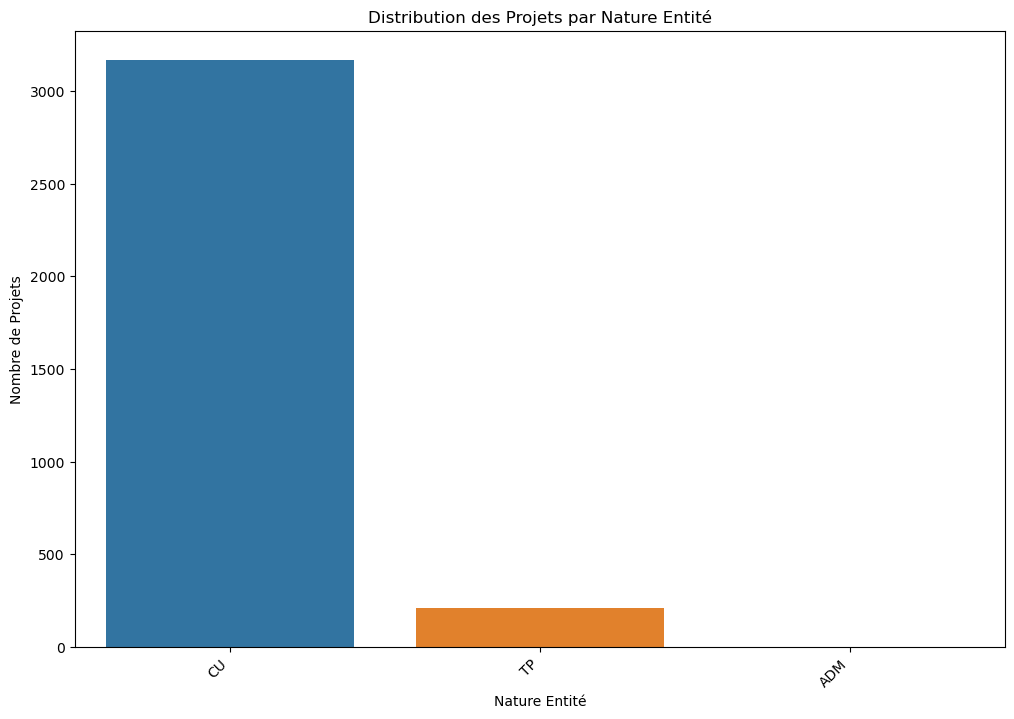

In [102]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Nature Entité', order=df['Nature Entité'].value_counts().index)
plt.xticks(rotation=45, ha='right') 
plt.title('Distribution des Projets par Nature Entité')
plt.xlabel('Nature Entité')
plt.ylabel('Nombre de Projets')
plt.show()

In [108]:
villes_selectionnees = [
    'Casablanca', 'Rabat', 'Tanger', 'Agadir', 'Salé',
    'Marrakech', 'Laayoune', 'Mohammadia', 'Meknes', 'Fes'
]

df_villes_selectionnees = df[df['Ville'].isin(villes_selectionnees)]


In [112]:
total_redevance_villes = df_villes_selectionnees.groupby('Ville')['Total Redevance'].sum().sort_values(ascending=False)


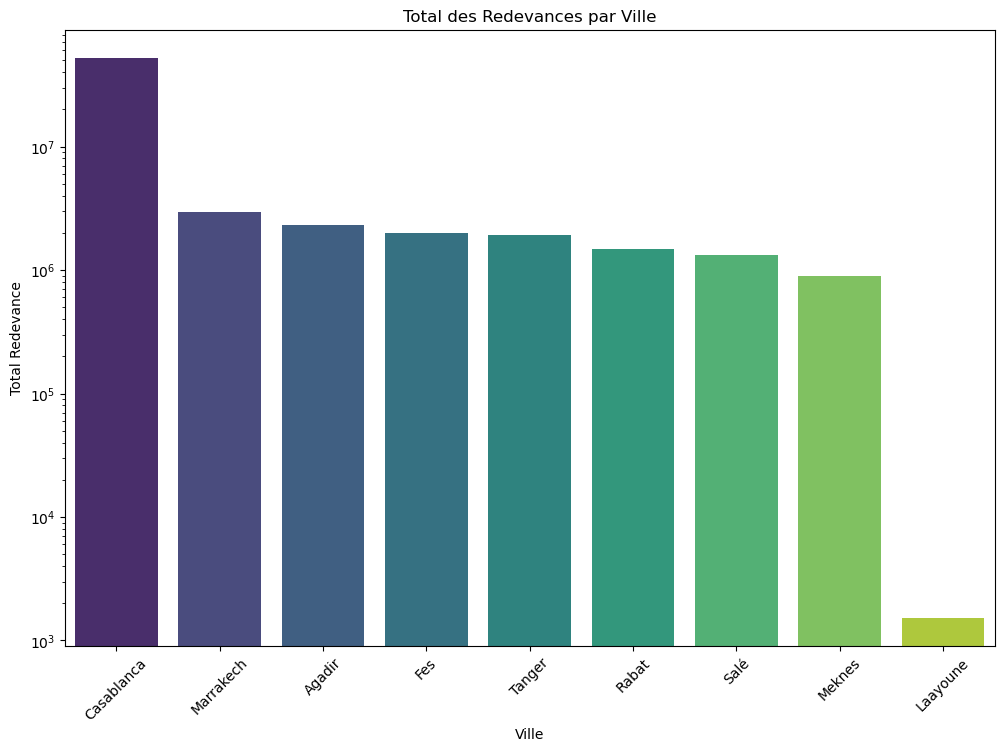

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=total_redevance_villes.index, y=total_redevance_villes.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Ville')
plt.ylabel('Total Redevance')
plt.title('Total des Redevances par Ville')
plt.yscale('log')  # Utiliser une échelle logarithmique pour l'axe y
plt.show()


In [114]:
df_villes_selectionnees = df[df['Ville'].isin(villes_selectionnees)]


In [115]:
distance_stats_villes = df_villes_selectionnees.groupby('Ville')['Distance Autorisation / ml'].describe()


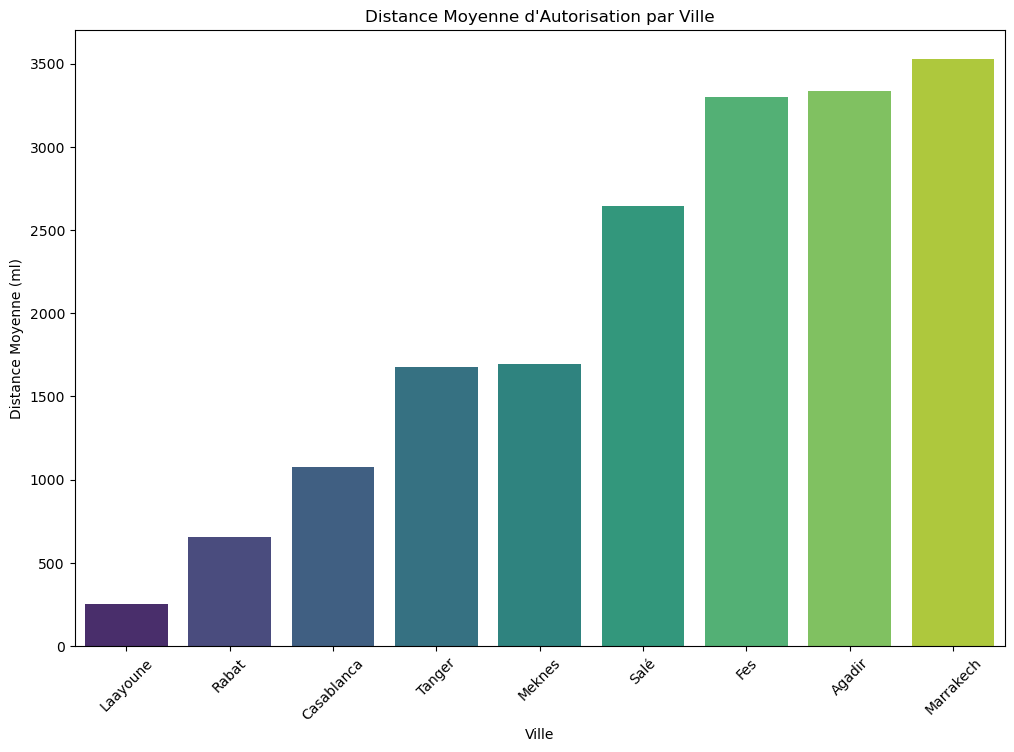

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la distance moyenne par ville
distance_moyenne_villes = df_villes_selectionnees.groupby('Ville')['Distance Autorisation / ml'].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=distance_moyenne_villes.index, y=distance_moyenne_villes.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Ville')
plt.ylabel('Distance Moyenne (ml)')
plt.title('Distance Moyenne d\'Autorisation par Ville')
plt.show()


In [120]:
# Compter le nombre de projets par ville
nombre_projets_villes = df['Ville'].value_counts()


In [121]:
# Choisir les 8 villes avec le plus grand nombre de projets
top_villes_projets = nombre_projets_villes.head(8)


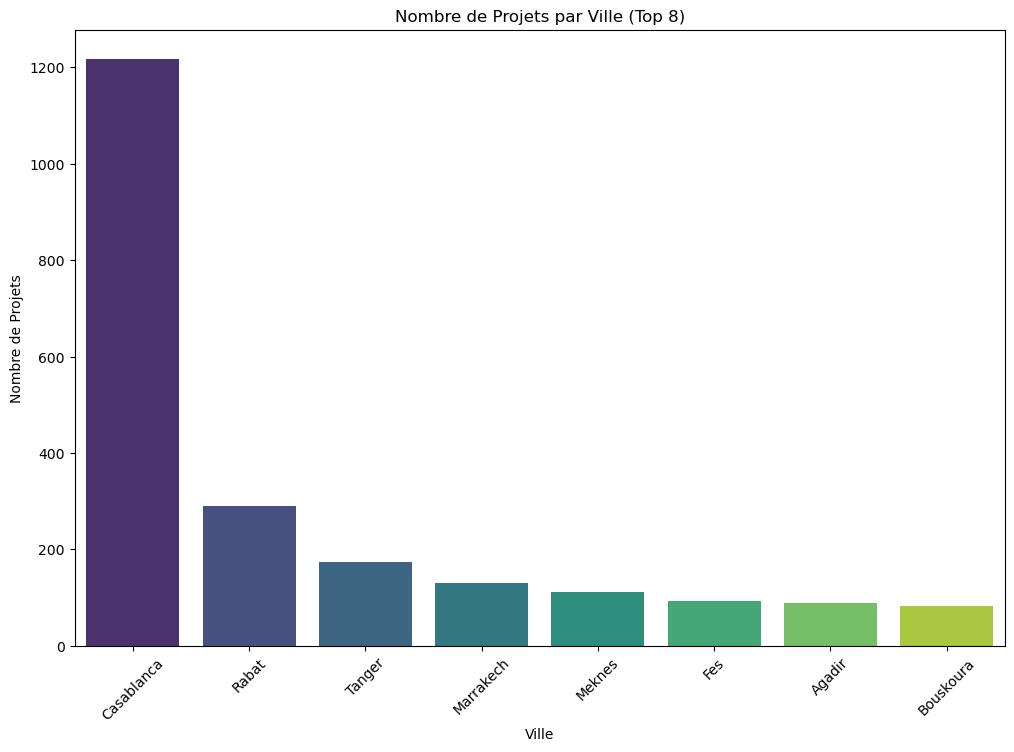

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=top_villes_projets.index, y=top_villes_projets.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Ville')
plt.ylabel('Nombre de Projets')
plt.title('Nombre de Projets par Ville (Top 8)')
plt.show()


In [123]:
# Filtrer les projets pour les villes avec le plus grand nombre de projets
df_top_villes = df[df['Ville'].isin(top_villes_projets.index)]


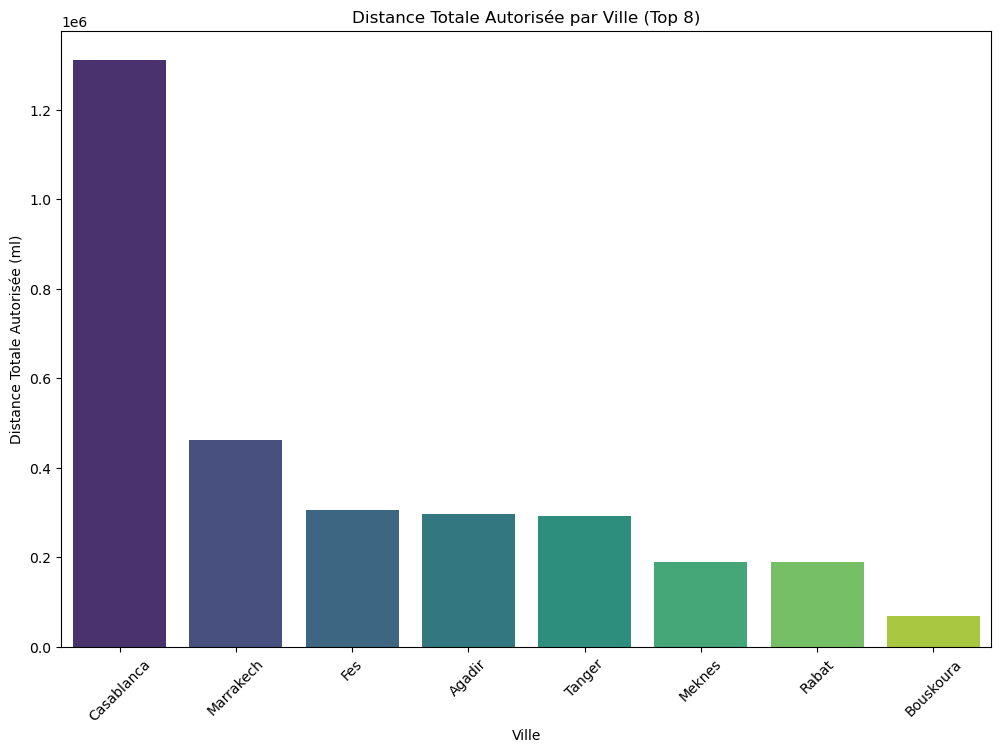

In [126]:
# Calculer la distance totale autorisée par ville
distance_totale_villes = df_top_villes.groupby('Ville')['Distance Autorisation / ml'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=distance_totale_villes.index, y=distance_totale_villes.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Ville')
plt.ylabel('Distance Totale Autorisée (ml)')
plt.title('Distance Totale Autorisée par Ville (Top 8)')
plt.show()


In [127]:
# Compter le nombre de projets par type de programme
nombre_programmes = df['Programme'].value_counts()
# Choisir les 8 types de programmes les plus fréquents
top_programmes = nombre_programmes.head(8)

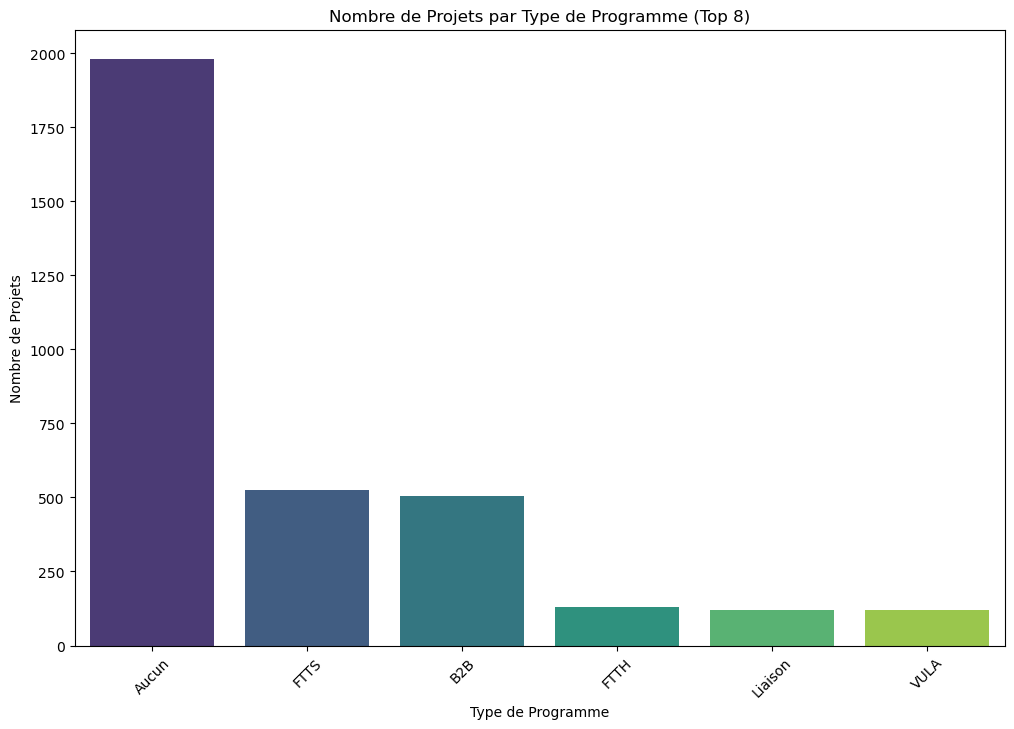

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=top_programmes.index, y=top_programmes.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Type de Programme')
plt.ylabel('Nombre de Projets')
plt.title('Nombre de Projets par Type de Programme (Top 8)')
plt.show()


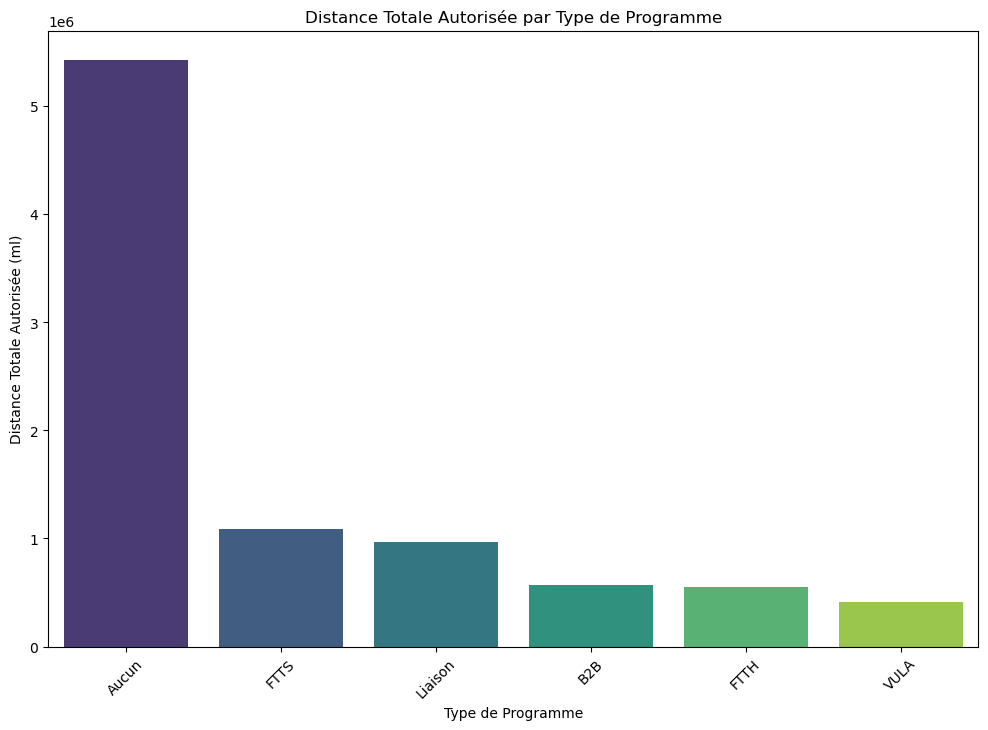

In [131]:
# Calculer la distance totale autorisée par type de programme
distance_totale_programmes = df.groupby('Programme')['Distance Autorisation / ml'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=distance_totale_programmes.index, y=distance_totale_programmes.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Type de Programme')
plt.ylabel('Distance Totale Autorisée (ml)')
plt.title('Distance Totale Autorisée par Type de Programme')
plt.show()


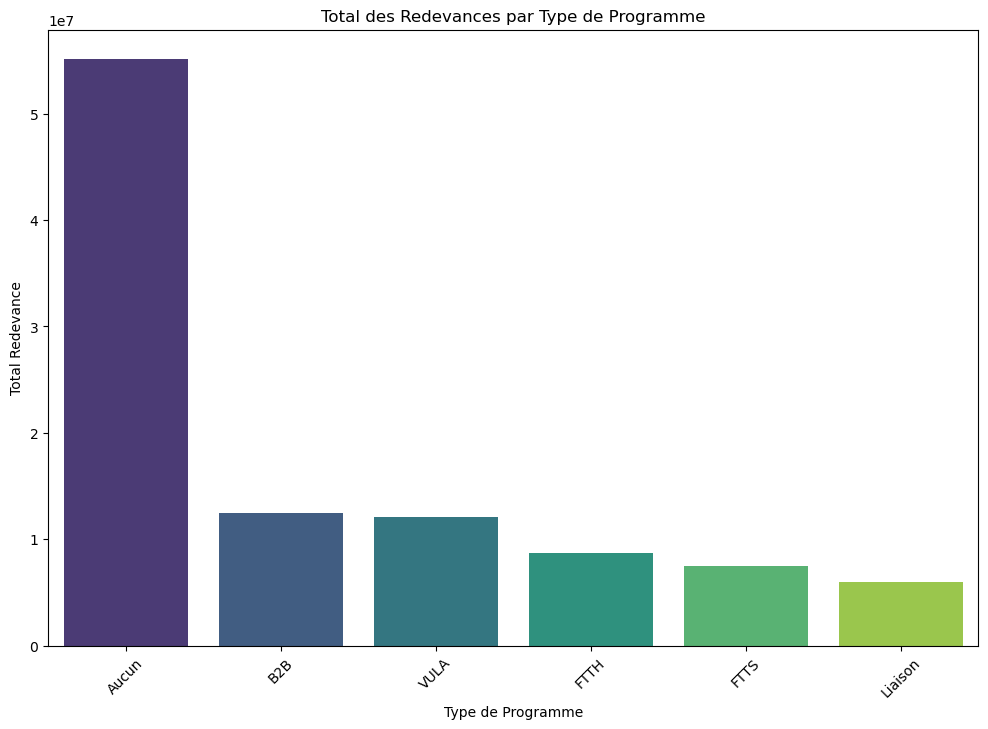

In [132]:
# Calculer la redevance totale par type de programme
redevance_totale_programmes = df.groupby('Programme')['Total Redevance'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=redevance_totale_programmes.index, y=redevance_totale_programmes.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Type de Programme')
plt.ylabel('Total Redevance')
plt.title('Total des Redevances par Type de Programme')
plt.show()


In [133]:
# Calculer la moyenne de la redevance par chambre pour chaque ville
redevance_chambre_villes = df.groupby('Ville')['Redevance / Chambre'].mean().sort_values(ascending=False)


In [134]:
# Sélectionner les 10 villes avec les valeurs les plus élevées de redevance par chambre
top_villes_redevance_chambre = redevance_chambre_villes.head(10)


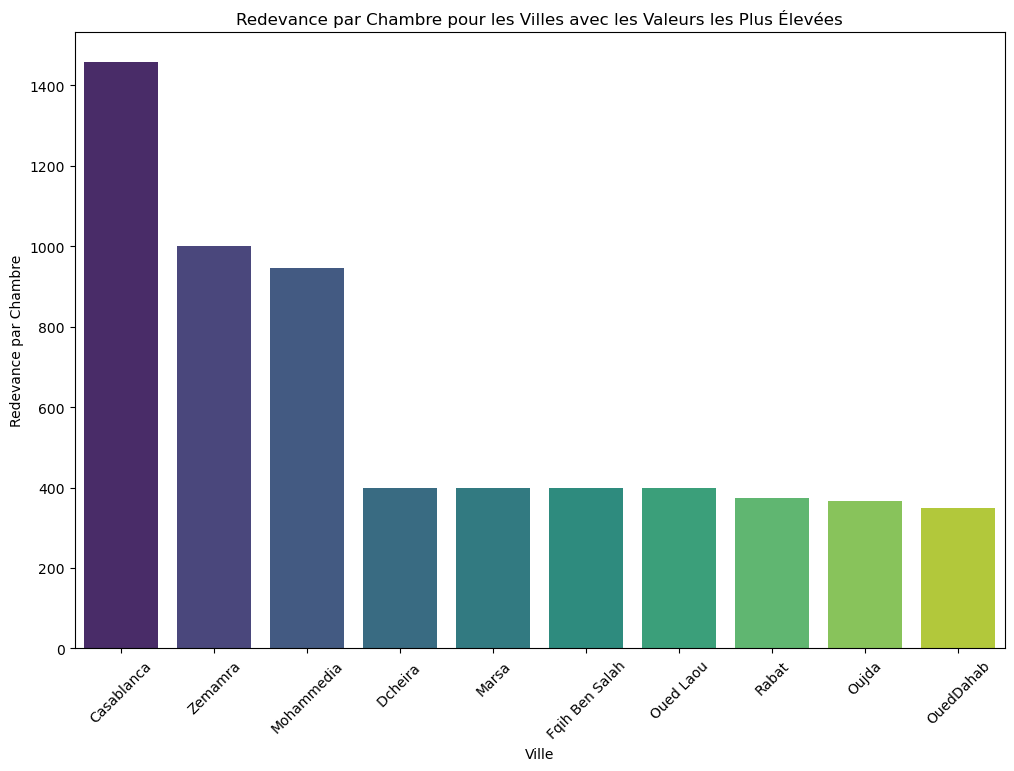

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=top_villes_redevance_chambre.index, y=top_villes_redevance_chambre.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Ville')
plt.ylabel('Redevance par Chambre')
plt.title('Redevance par Chambre pour les Villes avec les Valeurs les Plus Élevées')
plt.show()


In [136]:
# Calculer la moyenne de la redevance par chambre pour chaque ville
redevance_chambre_villes = df.groupby('Ville')['Redevance / Chambre'].mean().sort_values()


In [137]:
# Sélectionner les 10 villes avec les valeurs les plus basses de redevance par chambre
bottom_villes_redevance_chambre = redevance_chambre_villes.head(10)


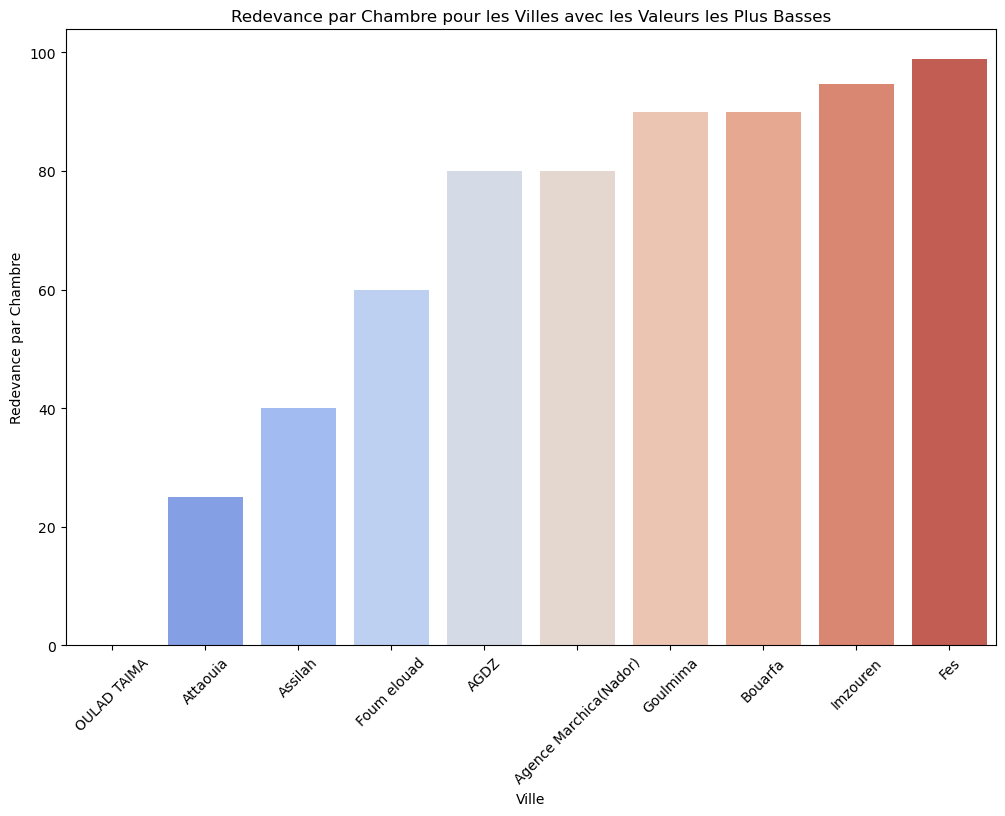

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=bottom_villes_redevance_chambre.index, y=bottom_villes_redevance_chambre.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Ville')
plt.ylabel('Redevance par Chambre')
plt.title('Redevance par Chambre pour les Villes avec les Valeurs les Plus Basses')
plt.show()


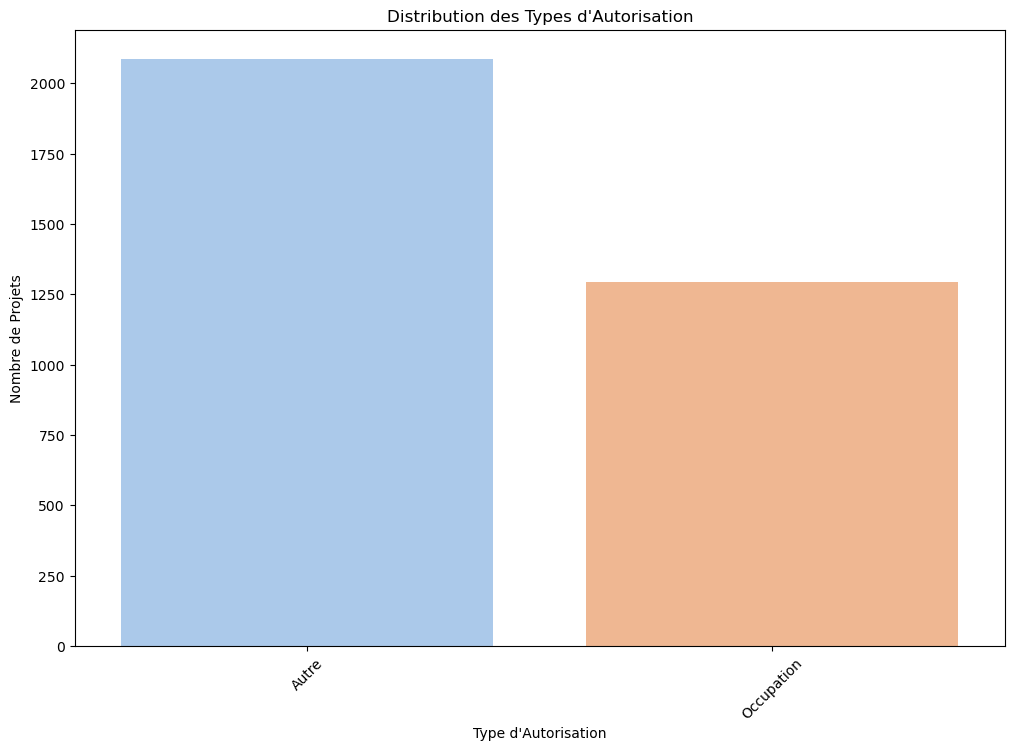

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter la fréquence des différents types d'autorisation
authorisation_counts = df['Autorisation'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=authorisation_counts.index, y=authorisation_counts.values, palette='pastel')
plt.xticks(rotation=45)
plt.xlabel('Type d\'Autorisation')
plt.ylabel('Nombre de Projets')
plt.title('Distribution des Types d\'Autorisation')
plt.show()


In [152]:
moyenne_duree = df[df['durée'] > 0]['durée'].mean()
df['durée'] = df['durée'].apply(lambda x: x if x >= 0 else moyenne_duree)

In [157]:
# Calculer la moyenne des durées par ville
moyenne_duree_ville = df.groupby('Ville')['durée'].mean()

# Sélectionner les 8 villes avec la moyenne des durées les plus élevées
top_8_villes = moyenne_duree_ville.nlargest(8)


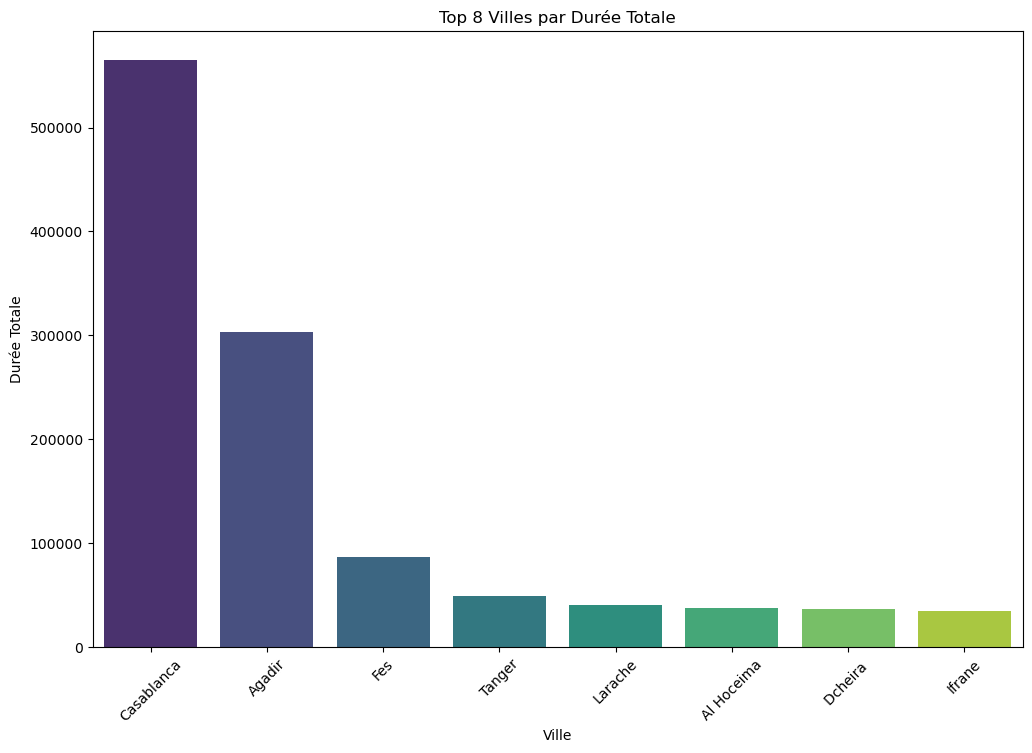

In [161]:
# Calculer la durée totale par ville
durée_totale_ville = df.groupby('Ville')['durée'].sum()

# Obtenir les 8 villes avec la durée totale la plus élevée
top_8_villes_durée = durée_totale_ville.nlargest(8)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_8_villes_durée.index, y=top_8_villes_durée.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Ville')
plt.ylabel('Durée Totale')
plt.title('Top 8 Villes par Durée Totale')
plt.show()


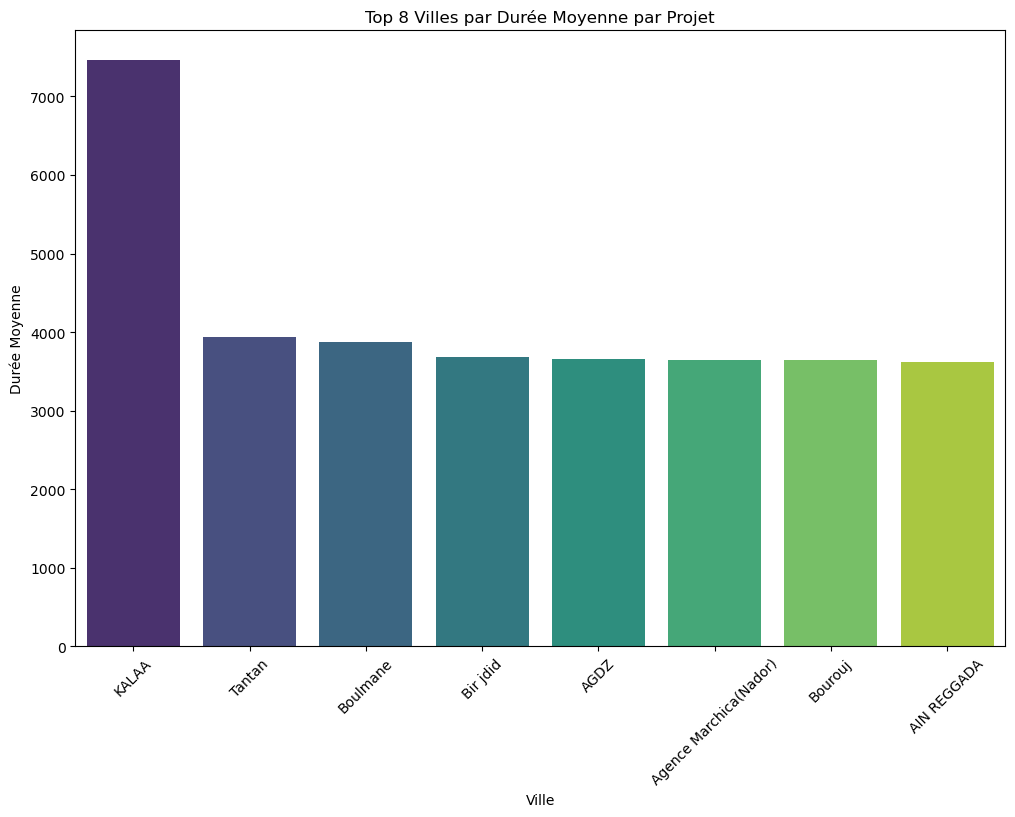

In [162]:
# Calculer la durée moyenne par projet dans chaque ville
durée_moyenne_ville = df.groupby('Ville')['durée'].mean()

# Obtenir les 8 villes avec la durée moyenne la plus élevée
top_8_villes_durée_moyenne = durée_moyenne_ville.nlargest(8)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_8_villes_durée_moyenne.index, y=top_8_villes_durée_moyenne.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Ville')
plt.ylabel('Durée Moyenne')
plt.title('Top 8 Villes par Durée Moyenne par Projet')
plt.show()


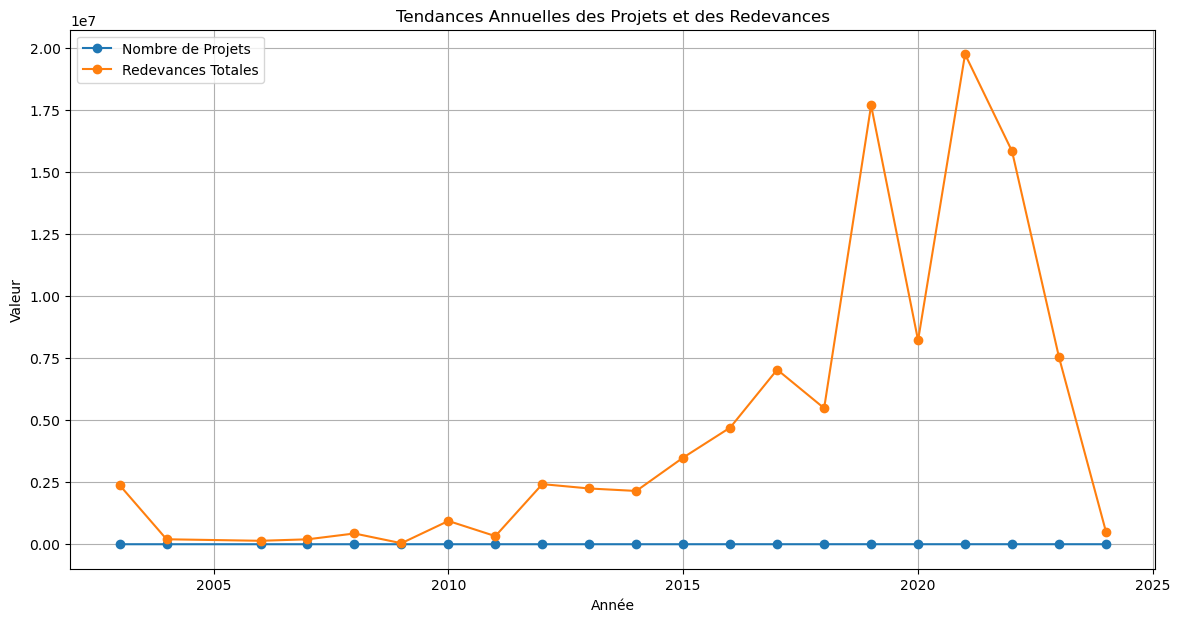

In [165]:
# Calculer le nombre de projets par année
tendances_annuelles = df.groupby('Année').agg({'Nom de projet': 'count', 'Total Redevance': 'sum'})

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(tendances_annuelles.index, tendances_annuelles['Nom de projet'], label='Nombre de Projets', marker='o')
plt.plot(tendances_annuelles.index, tendances_annuelles['Total Redevance'], label='Redevances Totales', marker='o')
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.title('Tendances Annuelles des Projets et des Redevances')
plt.legend()
plt.grid(True)
plt.show()


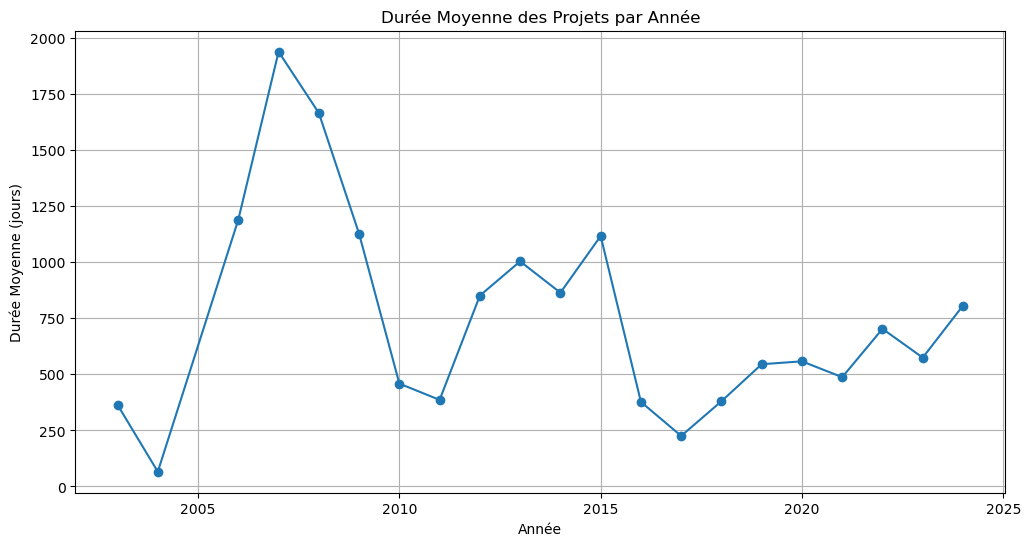

In [166]:
# Calculer la durée moyenne des projets
df['durée'] = (df['Date Fin'] - df['Date début']).dt.days
durée_moyenne = df.groupby('Année')['durée'].mean()

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(durée_moyenne.index, durée_moyenne, marker='o', linestyle='-')
plt.xlabel('Année')
plt.ylabel('Durée Moyenne (jours)')
plt.title('Durée Moyenne des Projets par Année')
plt.grid(True)
plt.show()


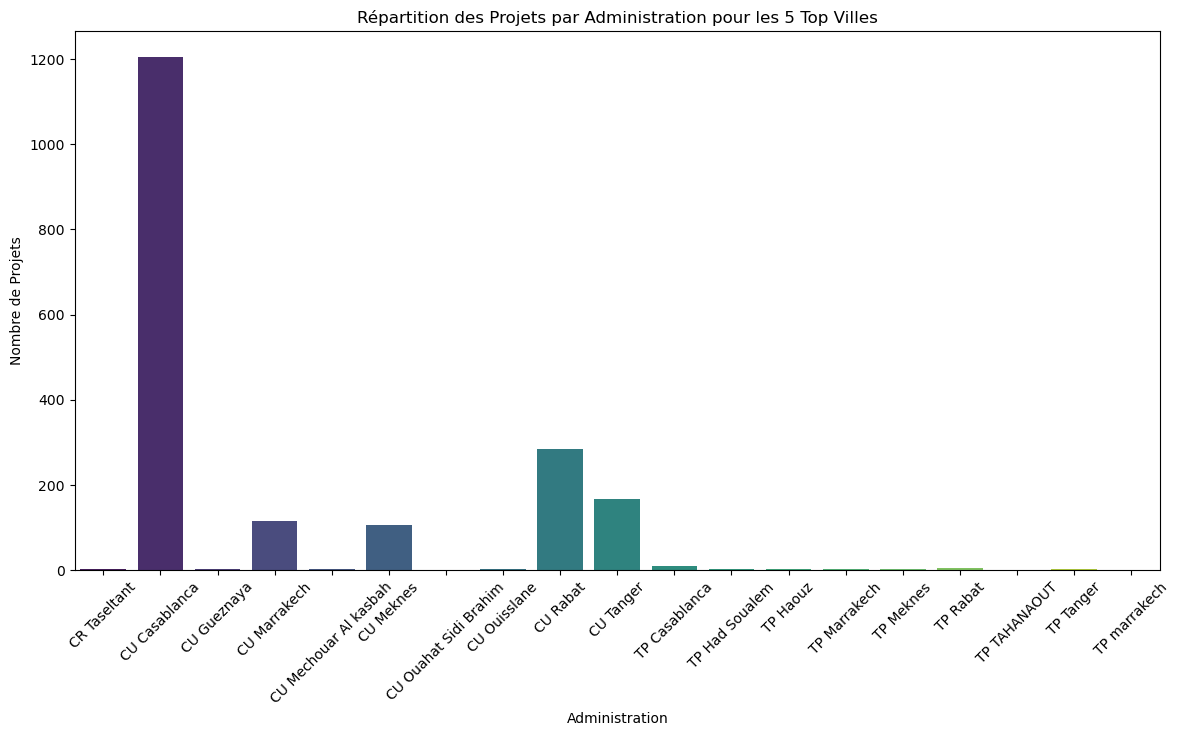

In [176]:
# Compter le nombre de projets pour chaque ville
projets_ville = df.groupby('Ville').agg({'Nom de projet': 'count'})
# Sélectionner les 5 villes avec le plus grand nombre de projets
top_villes = projets_ville.nlargest(5, 'Nom de projet')  
# Filtrer le DataFrame pour inclure seulement les villes sélectionnées
df_top_villes = df[df['Ville'].isin(top_villes.index)]
# Calculer le nombre de projets et les revenus totaux par administration pour les villes sélectionnées
projets_administration_top_villes = df_top_villes.groupby('Administration').agg({'Nom de projet': 'count', 'Total Redevance': 'sum'})

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.barplot(x=projets_administration_top_villes.index, y=projets_administration_top_villes['Nom de projet'], palette='viridis')
plt.xlabel('Administration')
plt.ylabel('Nombre de Projets')
plt.title('Répartition des Projets par Administration pour les 5 Top Villes')
plt.xticks(rotation=45)
plt.show()


Distance totale couverte: 9011524.52 ml
Distance moyenne par projet: 2666.13 ml


In [200]:
# Calculer la distance moyenne pour chaque type de projet
distance_par_type = df.groupby('Nature Entité')['Distance Autorisation / ml'].mean()
print(distance_par_type)


Nature Entité
ADM       68.000000
CU      1618.829732
TP     18245.265697
Name: Distance Autorisation / ml, dtype: float64


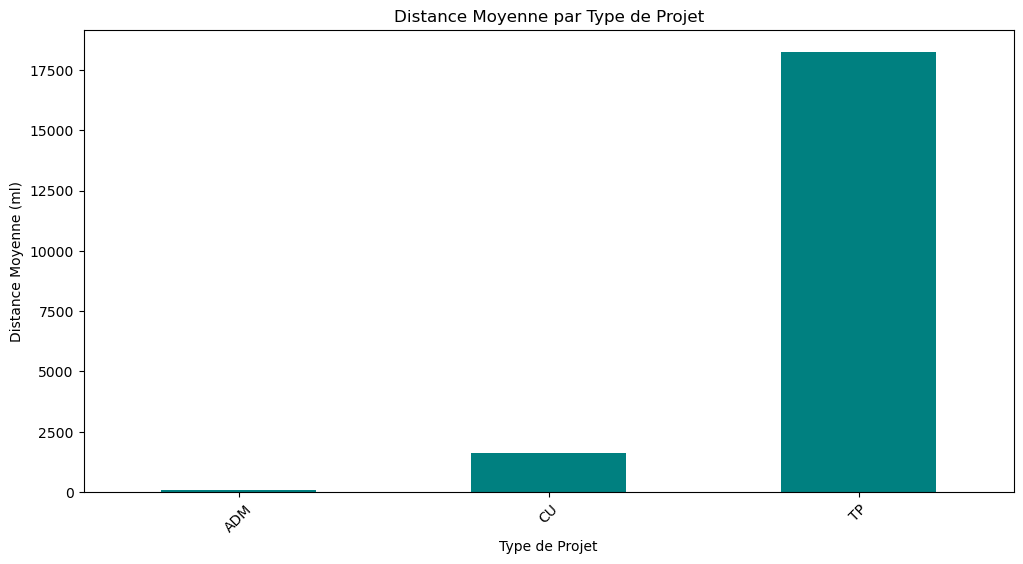

In [201]:
plt.figure(figsize=(12, 6))
distance_par_type.plot(kind='bar', color='teal')
plt.xlabel('Type de Projet')
plt.ylabel('Distance Moyenne (ml)')
plt.title('Distance Moyenne par Type de Projet')
plt.xticks(rotation=45)
plt.show()


In [181]:
# Calculer le nombre total de chambres
nombre_chambres_total = df['Nombre de chambres'].sum()

# Calculer le tarif moyen par chambre
tarif_chambre_moyen = df['Redevance / Chambre'].mean()

print(f'Nombre total de chambres: {nombre_chambres_total}')
print(f'Tarif moyen par chambre: {tarif_chambre_moyen:.2f}')


Nombre total de chambres: 31935.355004
Tarif moyen par chambre: 634.15


In [198]:
# Calculer les tarifs moyens par chambre pour chaque nature de projet
tarif_par_chambre = df.groupby('Nature Entité')['Redevance / Chambre'].mean()
print(tarif_par_chambre)


Nature Entité
ADM    100.000000
CU     669.748803
TP     100.000000
Name: Redevance / Chambre, dtype: float64


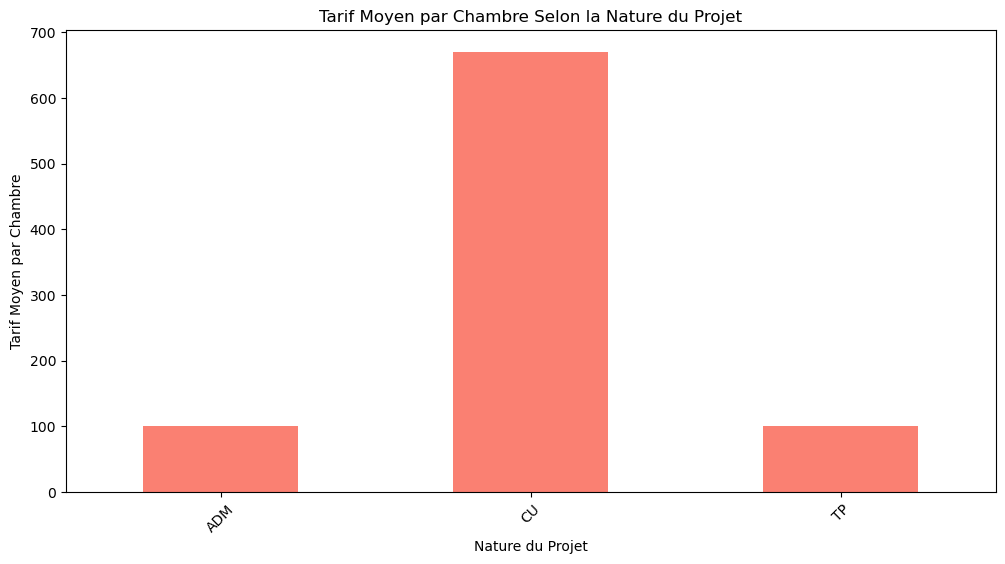

In [199]:
plt.figure(figsize=(12, 6))
tarif_par_chambre.plot(kind='bar', color='salmon')
plt.xlabel('Nature du Projet')
plt.ylabel('Tarif Moyen par Chambre')
plt.title('Tarif Moyen par Chambre Selon la Nature du Projet')
plt.xticks(rotation=45)
plt.show()


In [197]:
# Calculer la corrélation entre la distance et la redevance
correlation_distance_redevance = df[['Distance Autorisation / ml', 'Total Redevance']].corr().iloc[0, 1]
print(f"Corrélation entre Distance et Redevance: {correlation_distance_redevance}")


Corrélation entre Distance et Redevance: 0.7021612220917435


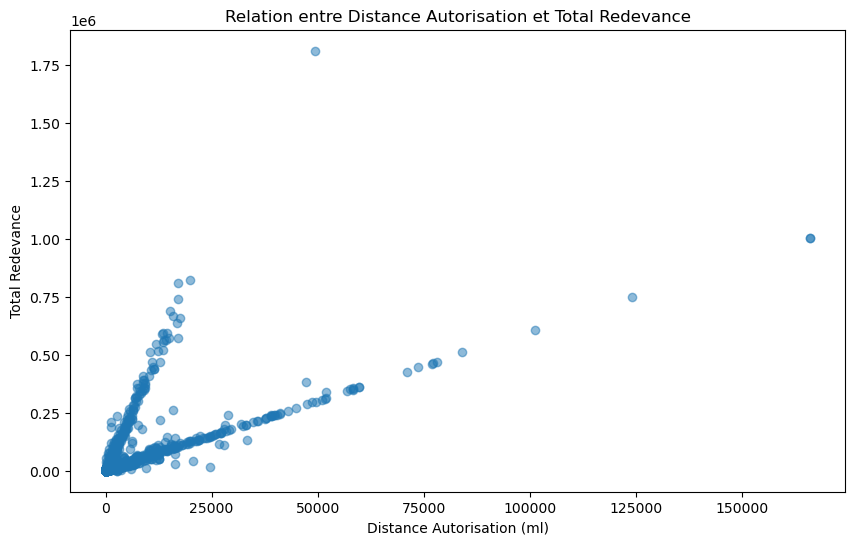

In [193]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance Autorisation / ml'], df['Total Redevance'], alpha=0.5)
plt.xlabel('Distance Autorisation (ml)')
plt.ylabel('Total Redevance')
plt.title('Relation entre Distance Autorisation et Total Redevance')
plt.show()


In [195]:
# Calculer la corrélation entre le nombre de chambres et la redevance
correlation_chambres_redevance = df[['Nombre de chambres', 'Total Redevance']].corr().iloc[0, 1]
print(f"Corrélation entre Nombre de Chambres et Redevance: {correlation_chambres_redevance}")


Corrélation entre Nombre de Chambres et Redevance: 0.5694723612873801


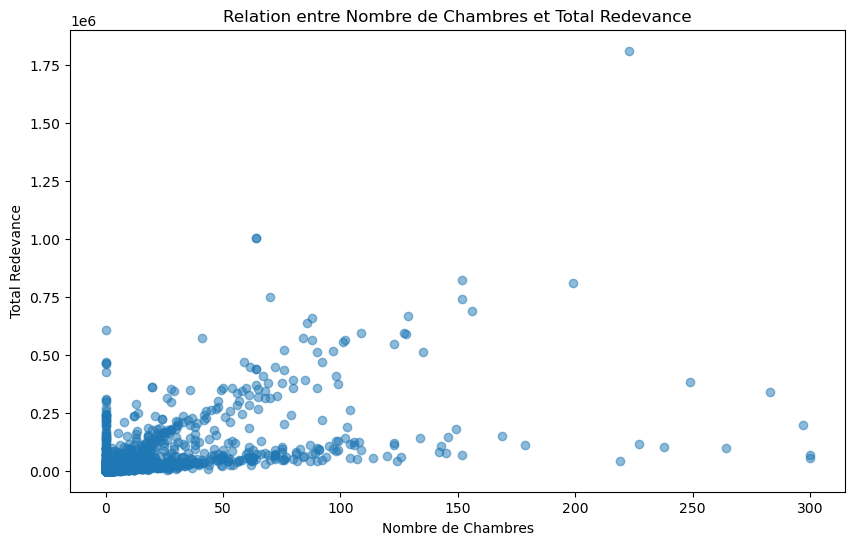

In [196]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Nombre de chambres'], df['Total Redevance'], alpha=0.5)
plt.xlabel('Nombre de Chambres')
plt.ylabel('Total Redevance')
plt.title('Relation entre Nombre de Chambres et Total Redevance')
plt.show()


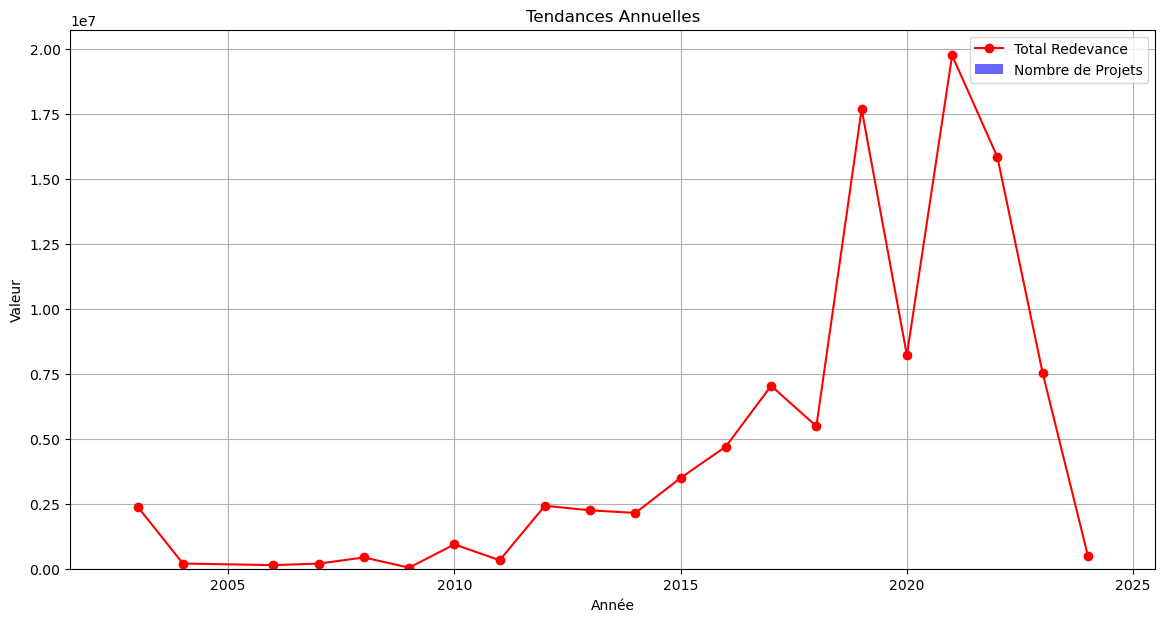

In [184]:
# Graphique combiné pour les tendances
plt.figure(figsize=(14, 7))
plt.bar(tendances_annuelles.index, tendances_annuelles['Nom de projet'], label='Nombre de Projets', color='blue', alpha=0.6)
plt.plot(tendances_annuelles.index, tendances_annuelles['Total Redevance'], marker='o', color='red', label='Total Redevance')
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.title('Tendances Annuelles')
plt.legend()
plt.grid(True)
plt.show()


In [186]:
# Trouver les projets avec les plus longues distances
projets_longue_distance = df.nlargest(10, 'Distance Autorisation / ml')  # 10 projets avec les plus longues distances
print(projets_longue_distance[['Nom de projet', 'Distance Autorisation / ml']])


                     Nom de projet  Distance Autorisation / ml
2426                         Aucun                    166000.0
2432      Liaison Azrou Errachidia                    166000.0
1648             Liaison Marrakech                    124016.0
2498                         Aucun                    101120.0
2116                         Aucun                     84000.0
1842                         Aucun                     78000.0
1750                         Aucun                     77230.0
1635                          BT66                     77000.0
3380   Liaison OUARZAZATE - AGDEZ                      73590.0
261                          Aucun                     71000.0


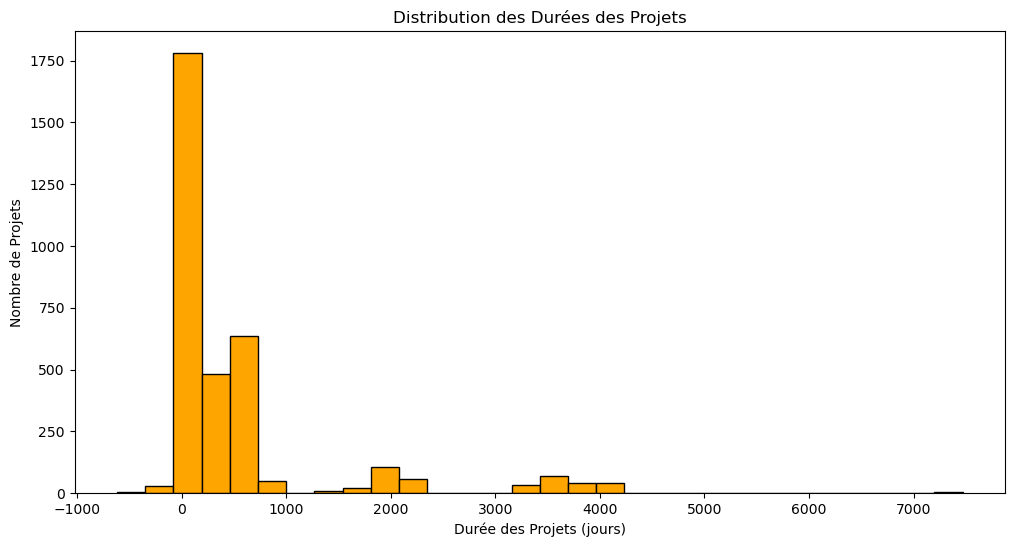

In [203]:
plt.figure(figsize=(12, 6))
plt.hist(df['Durée en jours'].dropna(), bins=30, color='orange', edgecolor='black')
plt.xlabel('Durée des Projets (jours)')
plt.ylabel('Nombre de Projets')
plt.title('Distribution des Durées des Projets')
plt.show()


In [204]:
# Calculer le revenu total et moyen par nature de projet
revenu_nature_projet = df.groupby('Nature Entité').agg({'Total Redevance': ['sum', 'mean']})
print(revenu_nature_projet)


              Total Redevance               
                          sum           mean
Nature Entité                               
ADM                  12240.00   12240.000000
CU                78542327.96   24808.063159
TP                23186448.00  108856.563380


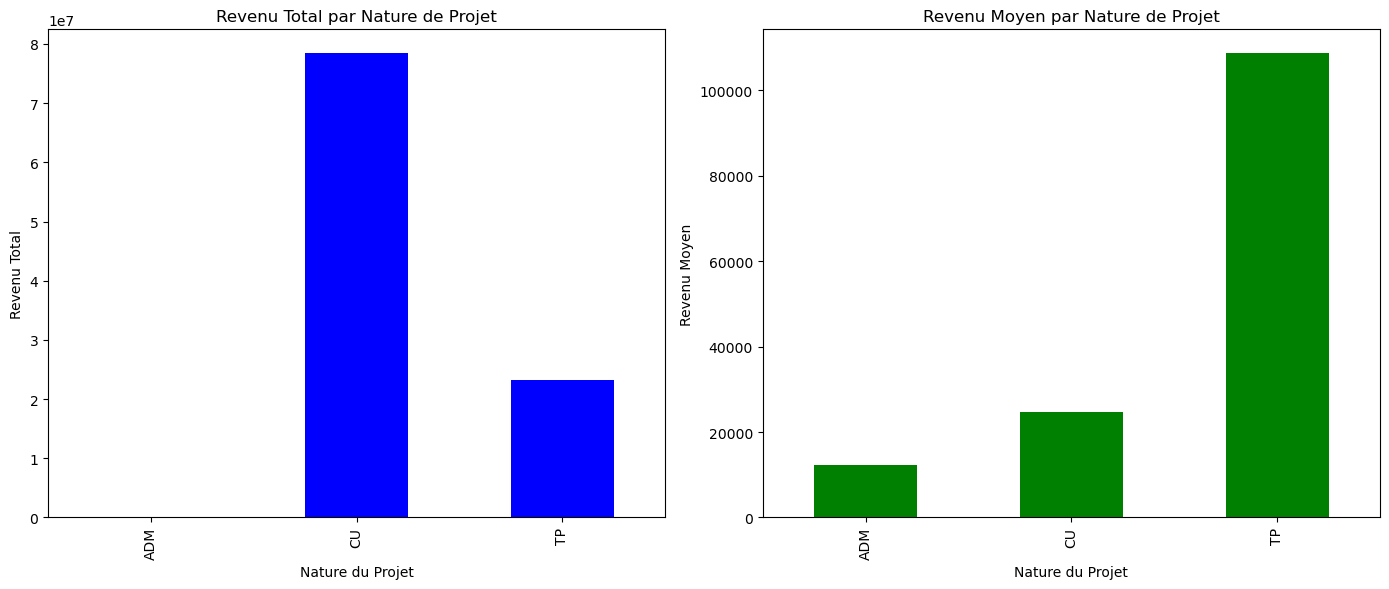

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Revenu Total
revenu_nature_projet['Total Redevance']['sum'].plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Revenu Total par Nature de Projet')
ax[0].set_xlabel('Nature du Projet')
ax[0].set_ylabel('Revenu Total')

# Revenu Moyen
revenu_nature_projet['Total Redevance']['mean'].plot(kind='bar', ax=ax[1], color='green')
ax[1].set_title('Revenu Moyen par Nature de Projet')
ax[1].set_xlabel('Nature du Projet')
ax[1].set_ylabel('Revenu Moyen')

plt.tight_layout()
plt.show()


In [206]:
# Calculer les tarifs moyens par chambre pour chaque type de projet
tarif_par_chambre_type = df.groupby('Nature Entité')['Redevance / Chambre'].mean()
print(tarif_par_chambre_type)


Nature Entité
ADM    100.000000
CU     669.748803
TP     100.000000
Name: Redevance / Chambre, dtype: float64


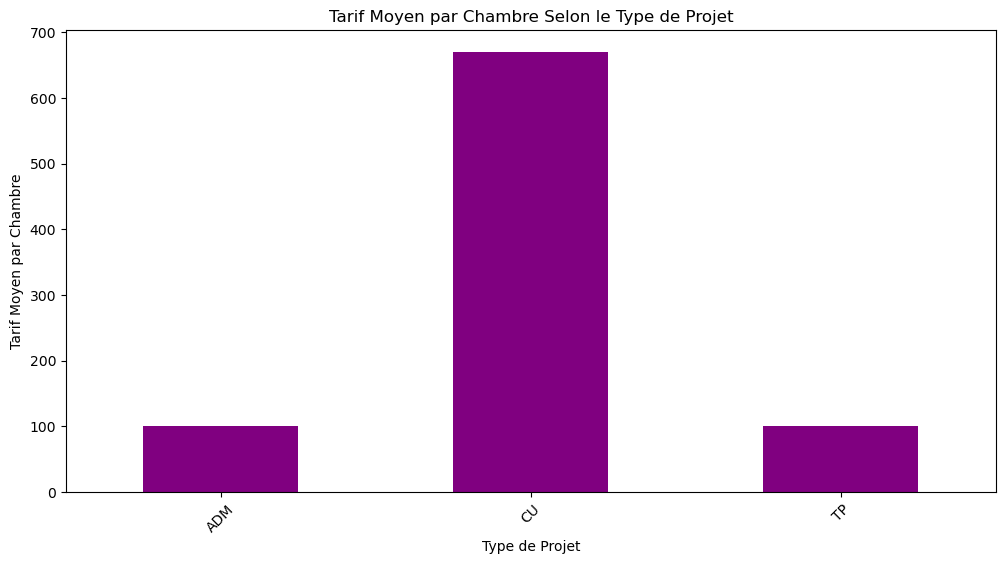

In [208]:
plt.figure(figsize=(12, 6))
tarif_par_chambre_type.plot(kind='bar', color='purple')
plt.xlabel('Type de Projet')
plt.ylabel('Tarif Moyen par Chambre')
plt.title('Tarif Moyen par Chambre Selon le Type de Projet')
plt.xticks(rotation=45)
plt.show()


In [209]:
# Compter le nombre de projets pour chaque type de projet
repartition_type_projet = df['Nature Entité'].value_counts()
print(repartition_type_projet)


Nature Entité
CU     3166
TP      213
ADM       1
Name: count, dtype: int64


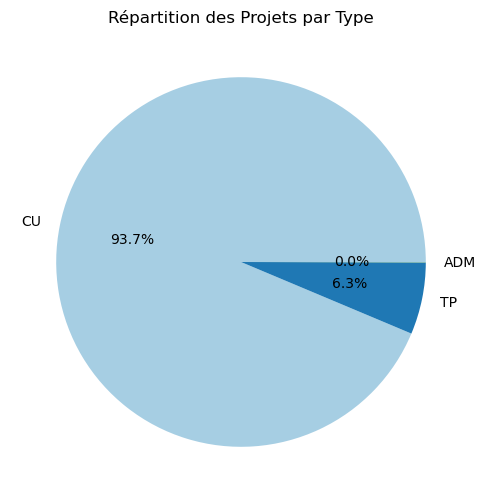

In [210]:
plt.figure(figsize=(12, 6))
repartition_type_projet.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(repartition_type_projet))))
plt.title('Répartition des Projets par Type')
plt.ylabel('')
plt.show()


In [211]:
# Trouver les projets avec les plus courtes distances
projets_courte_distance = df.nsmallest(10, 'Distance Autorisation / ml')  # 10 projets avec les plus courtes distances
print(projets_courte_distance[['Nom de projet', 'Distance Autorisation / ml']])


     Nom de projet  Distance Autorisation / ml
1683       CAS1593                        0.00
2573         KB052                        0.00
2574         KB053                        0.00
3329         Aucun                        0.00
157          Aucun                        0.96
158          Aucun                        0.96
583          Aucun                        2.00
603          Aucun                        2.00
1210           ANF                        2.00
1467       CAS1658                        2.00


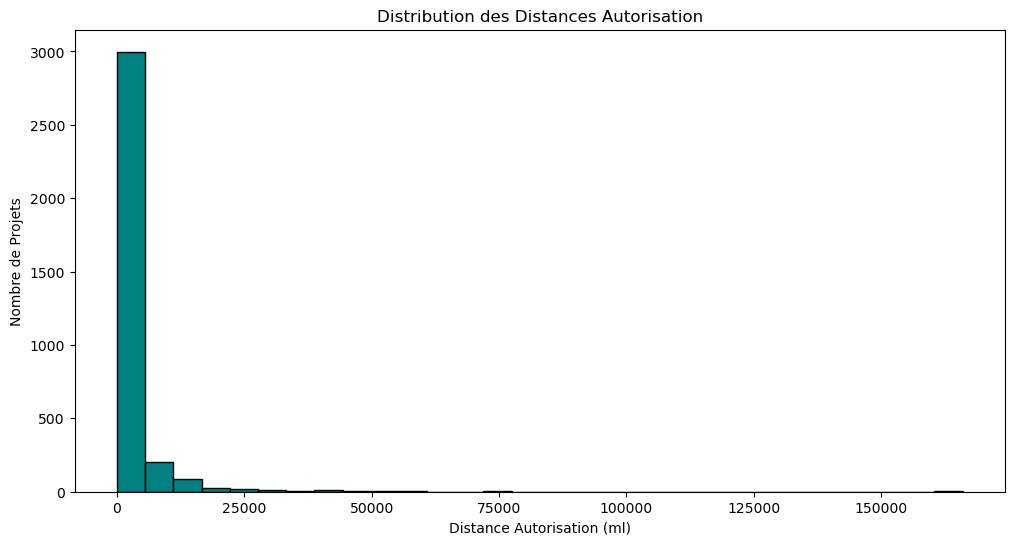

In [212]:
plt.figure(figsize=(12, 6))
plt.hist(df['Distance Autorisation / ml'].dropna(), bins=30, color='teal', edgecolor='black')
plt.xlabel('Distance Autorisation (ml)')
plt.ylabel('Nombre de Projets')
plt.title('Distribution des Distances Autorisation')
plt.show()


In [214]:
# Calculer la corrélation entre la distance et la durée du projet
df['Durée en jours'] = (df['Date Fin'] - df['Date début']).dt.days
correlation_distance_durée = df[['Distance Autorisation / ml', 'Durée en jours']].corr().iloc[0, 1]
print(f"Corrélation entre Distance et Durée: {correlation_distance_durée}")


Corrélation entre Distance et Durée: 0.3010429214507234


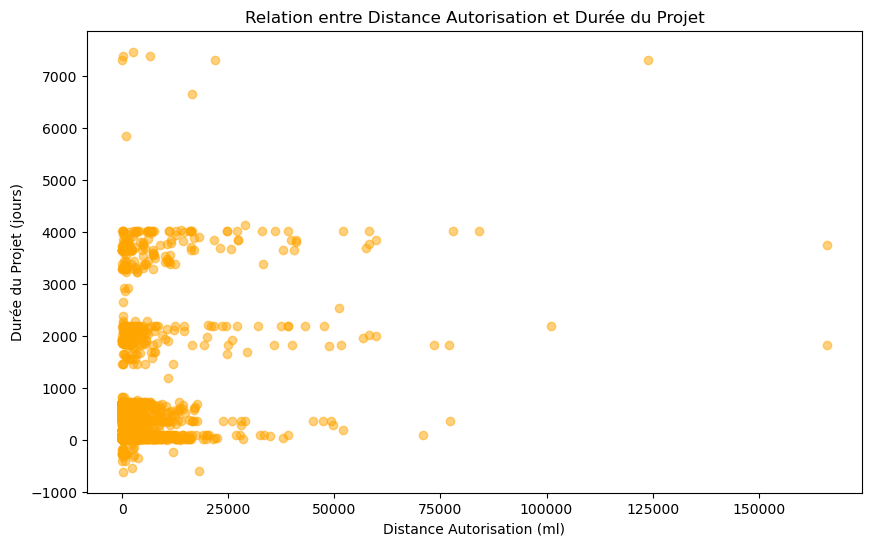

In [215]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance Autorisation / ml'], df['Durée en jours'], alpha=0.5, color='orange')
plt.xlabel('Distance Autorisation (ml)')
plt.ylabel('Durée du Projet (jours)')
plt.title('Relation entre Distance Autorisation et Durée du Projet')
plt.show()


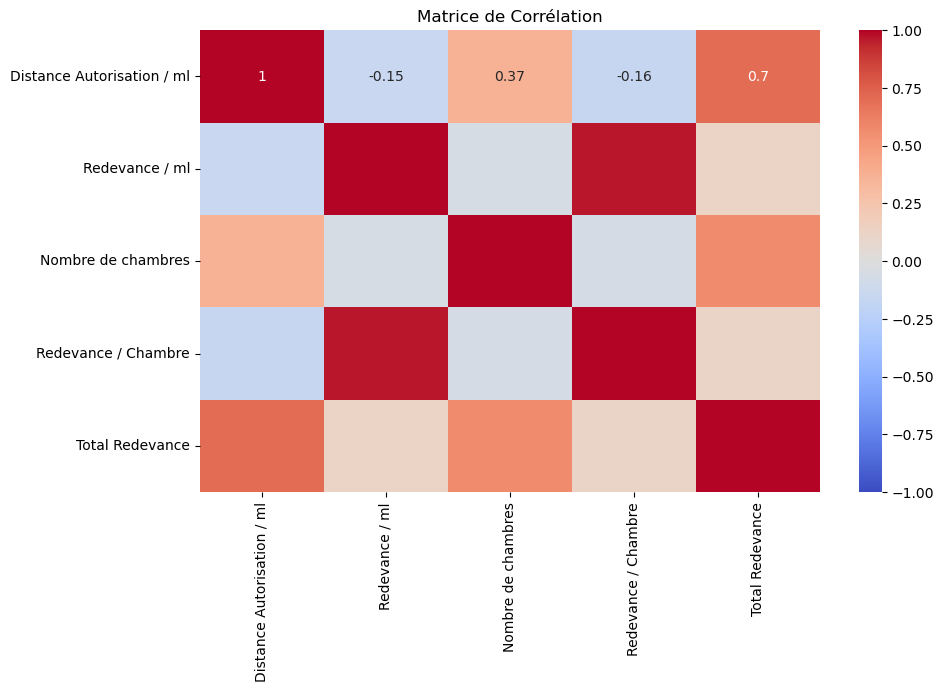

In [216]:
#Matrice de Corrélation Globale
# Sélectionner les colonnes numériques pertinentes
cols = ['Distance Autorisation / ml', 'Redevance / ml', 'Nombre de chambres', 'Redevance / Chambre', 'Total Redevance']

# Calculer la matrice de corrélation
corr_matrix = df[cols].corr()

# Visualiser la matrice de corrélation
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()


In [2]:
df.to_excel(r'C:\Users\ablab\Downloads\telecom.xlsx', index=False)

NameError: name 'df' is not defined